In [1]:
cd C:/Users/Watson Turbo/Desktop

C:\Users\Watson Turbo\Desktop


In [2]:
pwd

'C:\\Users\\Watson Turbo\\Desktop'

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Create dataframes from FRED data
cpi = pd.read_csv("CPI.csv")
wti = pd.read_csv("WTI.csv")
ind = pd.read_csv("Industrial Production.csv")
debt = pd.read_csv("Debt.csv")

In [5]:
cpi.head()

,Date,CPI
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [6]:
wti.head()

,Date,WTI
0,1/1/1947,1.62
1,2/1/1947,1.62
2,3/1/1947,1.62
3,4/1/1947,1.87
4,5/1/1947,1.87


In [7]:
ind.head()

,Date,Prod
0,1/1/1947,14.0679
1,2/1/1947,14.1510
2,3/1/1947,14.2341
3,4/1/1947,14.1233
4,5/1/1947,14.1787


In [8]:
debt.head()

,Date,Debt
0,1/1/1947,267.0
1,2/1/1947,268.8
2,3/1/1947,266.7
3,4/1/1947,265.0
4,5/1/1947,265.7


In [9]:
#Check date types
debt.dtypes, wti.dtypes, cpi.dtypes, ind.dtypes

(Date     object
 Debt    float64
 dtype: object, Date     object
 WTI     float64
 dtype: object, Date     object
 CPI     float64
 dtype: object, Date     object
 Prod    float64
 dtype: object)

In [10]:
#Convert Dates to be measurable
wti['Date'] = wti['Date'].astype('datetime64[ns]')
cpi['Date'] = cpi['Date'].astype('datetime64[ns]')
ind['Date'] = ind['Date'].astype('datetime64[ns]')
debt['Date'] = debt['Date'].astype('datetime64[ns]')

In [11]:
#Merge Dataframes based on Date
econ = pd.merge(wti, cpi)
econ = pd.merge(econ, ind)
econ = pd.merge(econ, debt)

In [12]:
econ.head()

,Date,WTI,CPI,Prod,Debt
0,1947-01-01,1.62,21.48,14.0679,267.0
1,1947-02-01,1.62,21.62,14.1510,268.8
2,1947-03-01,1.62,22.00,14.2341,266.7
3,1947-04-01,1.87,22.00,14.1233,265.0
4,1947-05-01,1.87,21.95,14.1787,265.7


In [13]:
# see if any columns have nulls
display(econ.isnull().any())

Date    False
WTI     False
CPI     False
Prod    False
Debt    False
dtype: bool

In [14]:
#Explore Stats
econ.describe(include='all')

,Date,WTI,CPI,Prod,Debt
count,869,869.000000,869.000000,869.000000,869.000000
unique,869,NaN,NaN,NaN,NaN
top,1995-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,1947-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2019-05-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,25.269162,108.923838,58.640564,4597.646145
std,NaN,27.625947,76.907265,30.450577,6110.097682
min,NaN,1.620000,21.480000,13.569500,253.800000
25%,NaN,3.000000,31.280000,31.376000,308.900000


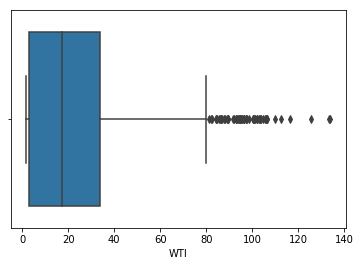

In [15]:
#Box Plot
sns.boxplot(x="WTI",data=econ)

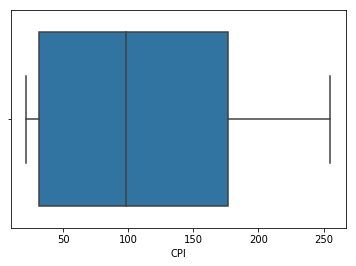

In [16]:
sns.boxplot(x="CPI",data=econ)

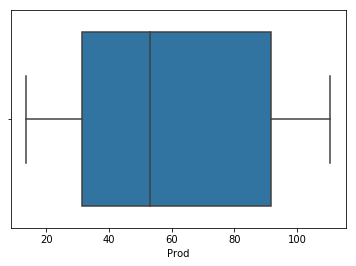

In [17]:
sns.boxplot(x="Prod",data=econ)

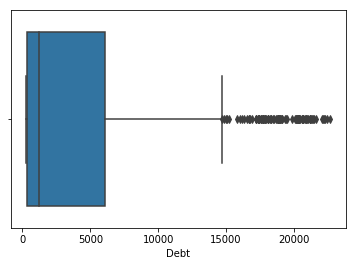

In [18]:
sns.boxplot(x="Debt",data=econ)

Interestingly enough, Debt and Oil boxplots show numerous outliers beyond the 75th percentile.

I would imagine these are both from recent spikes.

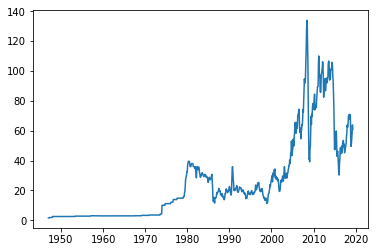

In [19]:
#Plot Oil Price with Matplotlib
from pandas import Series
x = econ['Date']
oil = econ['WTI']
plt.plot(x,oil)
plt.show()

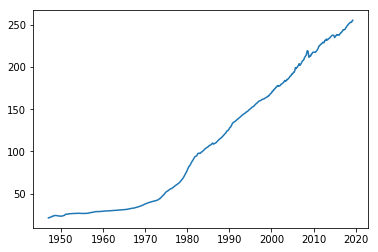

In [20]:
#Plot Inflation
cpi = econ['CPI']
plt.plot(x, cpi)
plt.show()

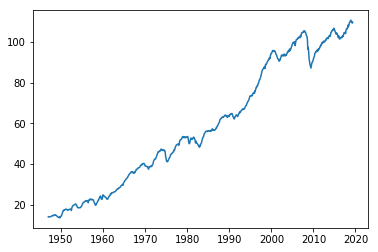

In [21]:
#Plot Industrial Production Index
prod = econ['Prod']
plt.plot(x, prod)
plt.show()

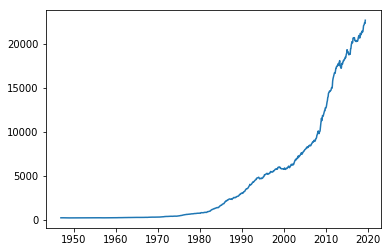

In [22]:
#Plot Federal Debt
debt = econ['Debt']
plt.plot(x, debt)
plt.show()

None of our data seems very stationary.
Therefore, we canot assume Constant Mean and Constant Variance.

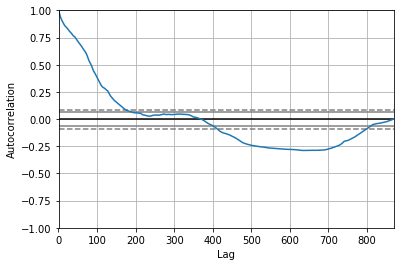

In [23]:
#Auto Correlation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil)
plt.show()

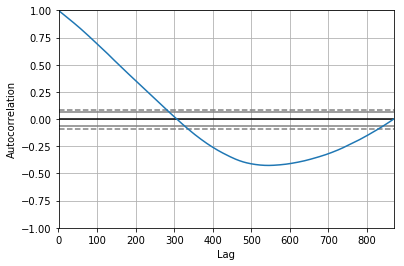

In [24]:
autocorrelation_plot(cpi)
plt.show()

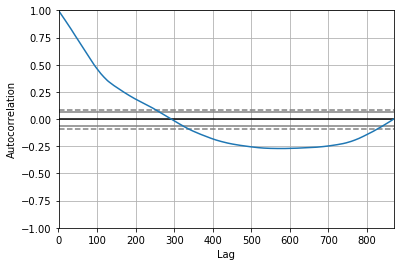

In [25]:
autocorrelation_plot(debt)
plt.show()

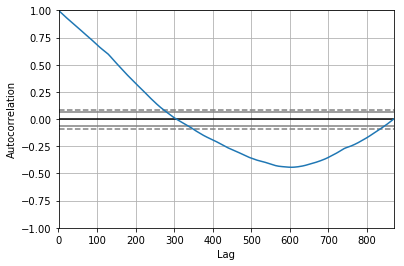

In [26]:
autocorrelation_plot(prod)
plt.show()

In [27]:
#Correlation Table
econ.corr()

,WTI,CPI,Prod,Debt
WTI,1.000000,0.839266,0.801016,0.814546
CPI,0.839266,1.000000,0.975032,0.903188
Prod,0.801016,0.975032,1.000000,0.840951
Debt,0.814546,0.903188,0.840951,1.000000


## Woah! All of these Economic Indicators are Highly correlated!

In [28]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [29]:
#Define Predictor Vairable X and Target Variable Y
x = econ[ ['WTI']]
y = econ[ ['CPI']]
#Fit the Model
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#Obtain the prediction
Yhat=lm.predict(x)

In [31]:
#View Intercept and Slope
lm.intercept_, lm.coef_

(array([49.88460156]), array([[2.33641446]]))

In [32]:
#OIl Price = 49.88- 2.34 * CPI

C:\Users\Watson Turbo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


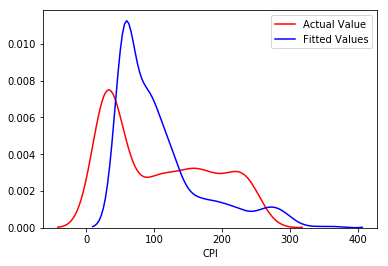

In [33]:
#Distribution Plot
ax1 = sns.distplot(econ['CPI'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

In [34]:
# P Value of same dataframe, note it should match the Correlation Table
from scipy import stats
pearson_coef, p_value = stats.pearsonr(econ['WTI'], econ['CPI'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8392661214888024  with a P-value of P = 1.2013961885775618e-231


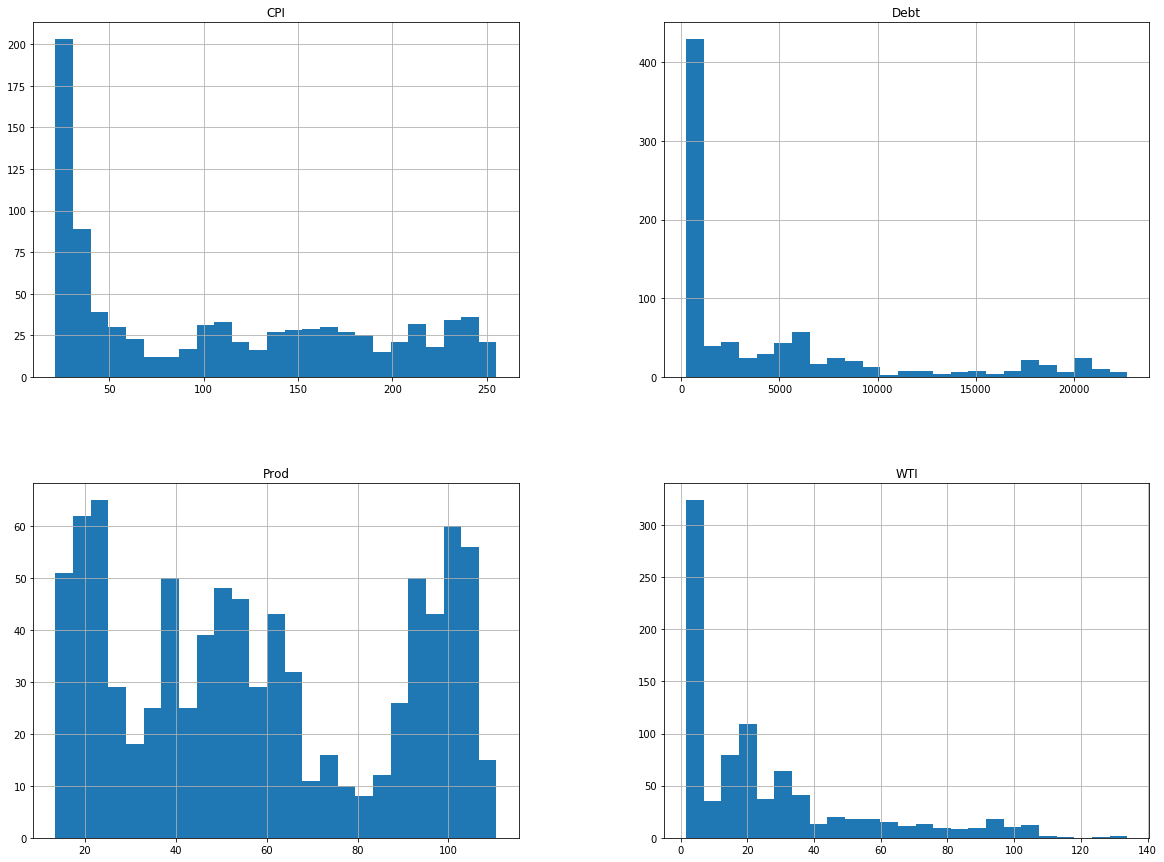

In [35]:
#Histogram
econ.hist(bins=25, figsize=(20,15))
plt.show()

(0, 414.58911072856216)

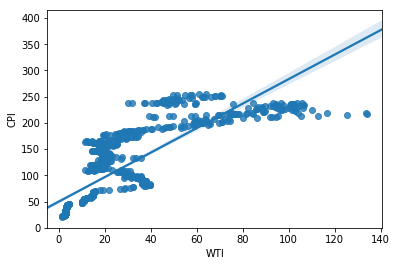

In [36]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 28260.439048406308)

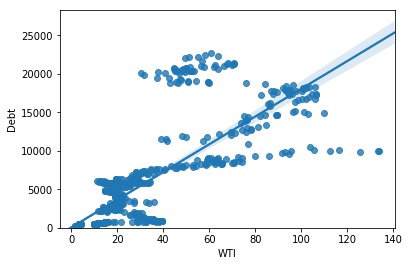

In [37]:
sns.regplot(x="WTI",y="Debt", data=econ)
plt.ylim(0,)

(0, 174.8892853536159)

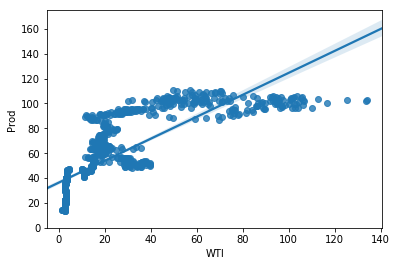

In [38]:
sns.regplot(x="WTI",y="Prod", data=econ)
plt.ylim(0,)

(0, 414.71982370756507)

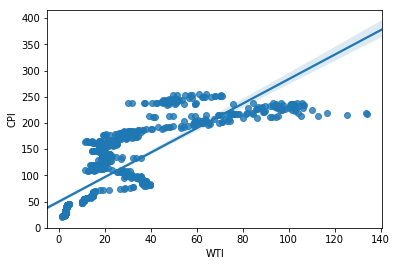

In [39]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 140.94252953747866)

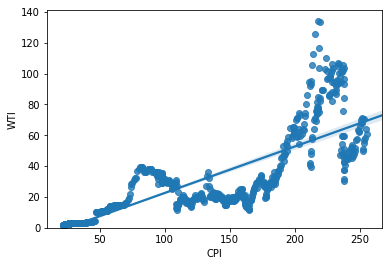

In [40]:
sns.regplot(x="CPI",y="WTI", data=econ)
plt.ylim(0,)

(0, 23978.53146510867)

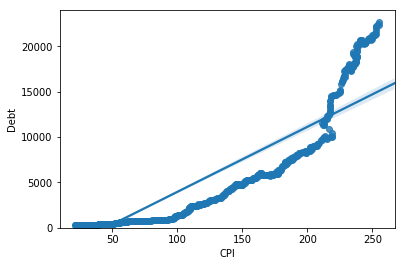

In [41]:
sns.regplot(x="CPI",y="Debt", data=econ)
plt.ylim(0,)

(0, 126.01367690313313)

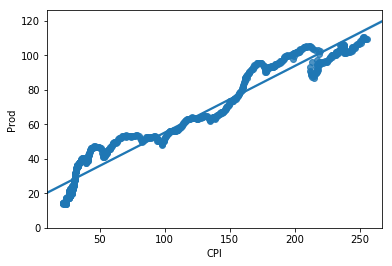

In [42]:
sns.regplot(x="CPI",y="Prod", data=econ)
plt.ylim(0,)

(0, 268.9047690446339)

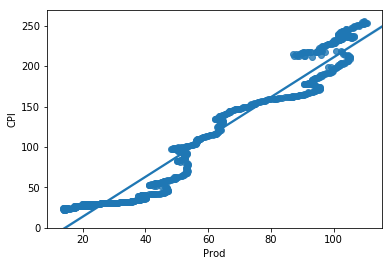

In [43]:
sns.regplot(x="Prod",y="CPI", data=econ)
plt.ylim(0,)

(0, 141.29395886285255)

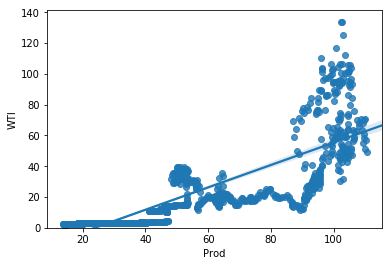

In [44]:
sns.regplot(x="Prod",y="WTI", data=econ)
plt.ylim(0,)

(0, 24053.169967773556)

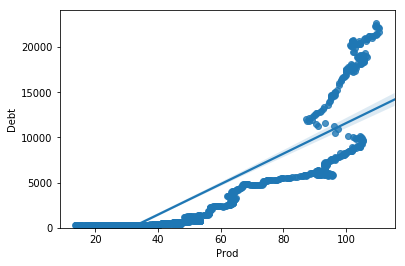

In [45]:
sns.regplot(x="Prod",y="Debt", data=econ)
plt.ylim(0,)

(0, 150.19295869771867)

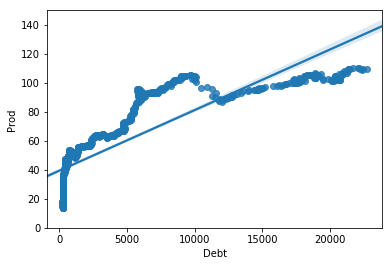

In [46]:
sns.regplot(x="Debt",y="Prod", data=econ)
plt.ylim(0,)

(0, 140.58768499769468)

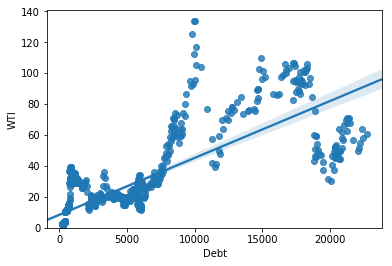

In [47]:
sns.regplot(x="Debt",y="WTI", data=econ)
plt.ylim(0,)

(0, 352.61789186997134)

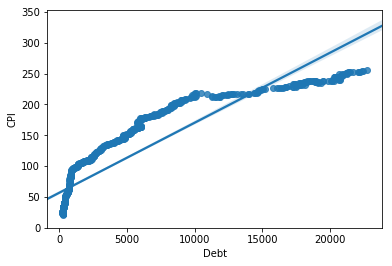

In [48]:
sns.regplot(x="Debt",y="CPI", data=econ)
plt.ylim(0,)

#Residual Plot to determine if Linear Regression is appropriate

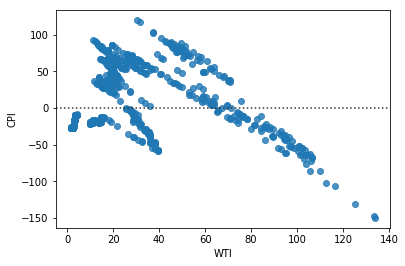

In [49]:
#
sns.residplot(econ['WTI'], econ['CPI'], robust=True)

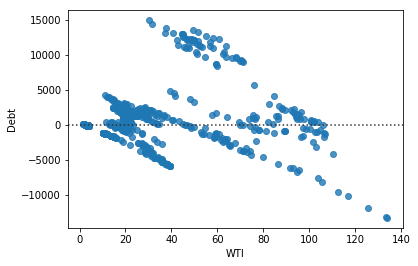

In [50]:
#
sns.residplot(econ['WTI'], econ['Debt'], robust=True)

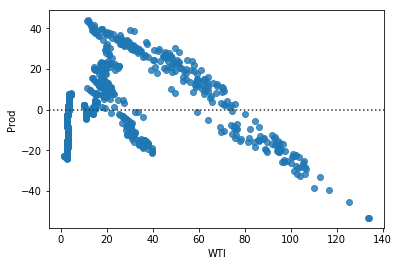

In [51]:
#
sns.residplot(econ['WTI'], econ['Prod'], robust=True)

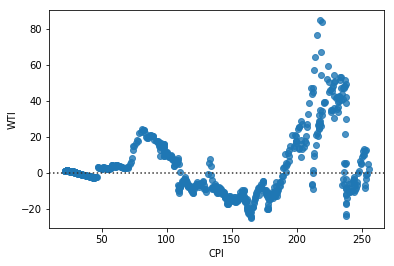

In [52]:
#
sns.residplot(econ['CPI'], econ['WTI'], robust=True)

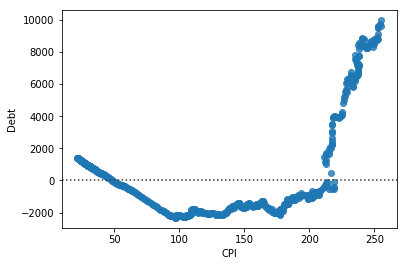

In [53]:
#
sns.residplot(econ['CPI'], econ['Debt'], robust=True)

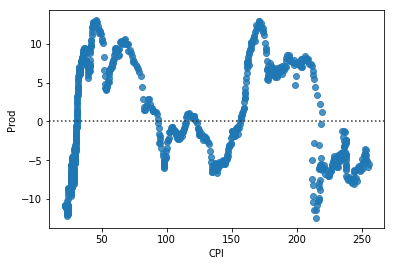

In [54]:
#
sns.residplot(econ['CPI'], econ['Prod'], robust=True)

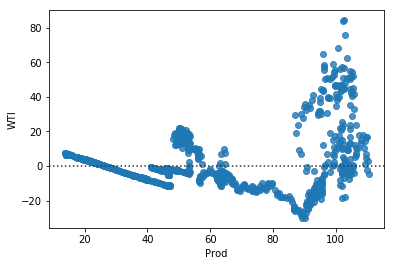

In [55]:
#
sns.residplot(econ['Prod'], econ['WTI'], robust=True)

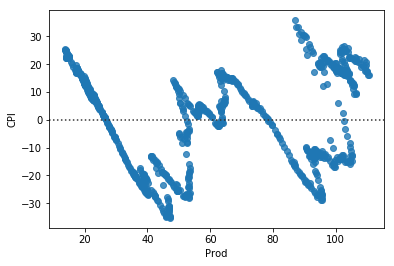

In [56]:
#
sns.residplot(econ['Prod'], econ['CPI'], robust=True)

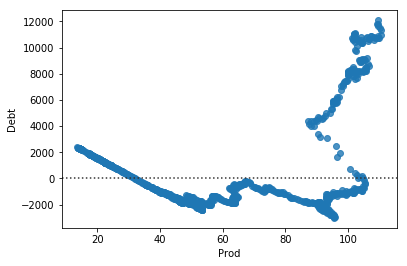

In [57]:
#
sns.residplot(econ['Prod'], econ['Debt'], robust=True)

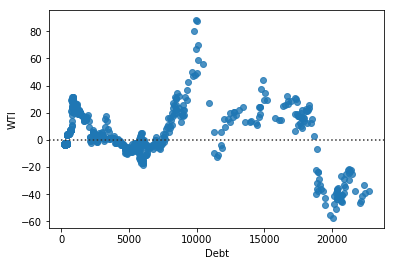

In [58]:
#
sns.residplot(econ['Debt'], econ['WTI'], robust=True)

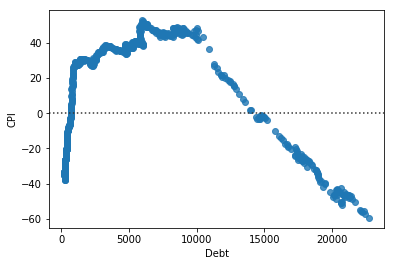

In [59]:
#
sns.residplot(econ['Debt'], econ['CPI'], robust=True)

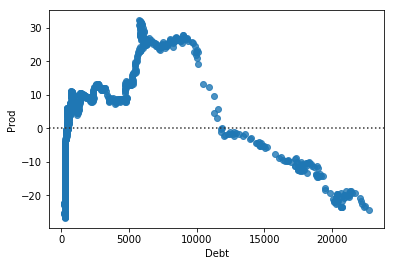

In [60]:
#
sns.residplot(econ['Debt'], econ['Prod'], robust=True)

In [61]:
#To call 5 highest Months of Oil Prices 
econ.nlargest(5, 'WTI')

,Date,WTI,CPI,Prod,Debt
737,2008-06-01,133.93,217.463,102.8445,9969.0
738,2008-07-01,133.44,219.016,102.3002,10045.5
736,2008-05-01,125.39,215.208,103.0863,9824.8
739,2008-08-01,116.61,218.690,100.7353,10134.7
735,2008-04-01,112.57,213.942,103.6704,9932.8


In [62]:
#To call 5 highest Months of Inflation
econ.nlargest(5, 'CPI')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
867,2019-04-01,63.86,254.958,109.1657,22346.6
866,2019-03-01,58.15,254.148,109.5985,22425.2
865,2019-02-01,54.95,253.113,109.4709,22221.4
861,2018-10-01,70.75,252.794,109.9165,21419.9


In [63]:
#To call 5 highest Months of Production
econ.nlargest(5, 'Prod')

,Date,WTI,CPI,Prod,Debt
863,2018-12-01,49.52,252.723,110.5516,22075.2
862,2018-11-01,56.96,252.760,110.5067,21683.9
864,2019-01-01,51.38,252.673,110.0907,22160.0
861,2018-10-01,70.75,252.794,109.9165,21419.9
860,2018-09-01,70.23,252.010,109.6749,21353.1


In [64]:
#To call 5 highest Months of Debt
econ.nlargest(5, 'Debt')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
866,2019-03-01,58.15,254.148,109.5985,22425.2
867,2019-04-01,63.86,254.958,109.1657,22346.6
865,2019-02-01,54.95,253.113,109.4709,22221.4
864,2019-01-01,51.38,252.673,110.0907,22160.0


In [65]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.3364144639339086
intercept 49.88460155937028
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.05140633509958201
r-squared: 0.7043676226788571


In [66]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.882916493611895
intercept 36.3300040766315
r_value 0.8010161611474097
p_value 2.15420852806911e-195
std_err 0.022409724128482012
r-squared: 0.6416268904193331


In [67]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 180.15508916077238
intercept 45.277965842734375
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 4.357361974143156
r-squared: 0.6634850065995124


In [68]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.301473746868048
intercept -7.568515232625909
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.0066330955806237595
r-squared: 0.7043676226788571


In [69]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.38605318001320255
intercept 16.5901702712182
r_value 0.9750322408231151
p_value 0.0
std_err 0.002986039078698132
r-squared: 0.9506878706445452


In [70]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 71.75613995525735
intercept -3218.3080006662767
r_value 0.9031882597022928
p_value 1.077e-320
std_err 1.1581801688906967
r-squared: 0.8157490324640563


In [71]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.7267129961459007
intercept -17.34569785853188
r_value 0.8010161611474096
p_value 2.1542085280694776e-195
std_err 0.01844504874701193
r-squared: 0.6416268904193329


In [72]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.4625826696001654
intercept -35.48339941886681
r_value 0.9750322408231153
p_value 0.0
std_err 0.01904755216807009
r-squared: 0.9506878706445456


In [73]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 168.742055047499
intercept -5297.483169239187
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 3.6874795991663865
r-squared: 0.7071986355078733


In [74]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.0036828546431314593
intercept 8.336699802898544
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 8.907620013973956e-05
r-squared: 0.6634850065995124


In [75]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.011368351655659104
intercept 56.65617957995393
r_value 0.9031882597022929
p_value 1.077e-320
std_err 0.0001834909103077444
r-squared: 0.8157490324640565


In [76]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.004191004046435283
intercept 39.37181061398917
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 9.158500479861811e-05
r-squared: 0.7071986355078733


## Multiple Linear Regression

In [77]:
#Introducing the 3 Month Treasury Bill
rate = pd.read_csv("3 Month Treasury Bill.txt")

In [78]:
rate.dtypes

Date     object
Rate    float64
dtype: object

In [79]:
rate['Date'] = rate['Date'].astype('datetime64[ns]')

In [80]:
display(rate.isnull().any())

Date    False
Rate    False
dtype: bool

In [81]:
econ = pd.merge(econ, rate)

In [82]:
econ.head()

,Date,WTI,CPI,Prod,Debt,Rate
0,1947-01-01,1.62,21.48,14.0679,267.0,0.38
1,1947-02-01,1.62,21.62,14.1510,268.8,0.38
2,1947-03-01,1.62,22.00,14.2341,266.7,0.38
3,1947-04-01,1.87,22.00,14.1233,265.0,0.38
4,1947-05-01,1.87,21.95,14.1787,265.7,0.38


In [83]:
econ.corr()

,WTI,CPI,Prod,Debt,Rate
WTI,1.000000,0.839266,0.801016,0.814546,-0.230122
CPI,0.839266,1.000000,0.975032,0.903188,-0.243221
Prod,0.801016,0.975032,1.000000,0.840951,-0.135257
Debt,0.814546,0.903188,0.840951,1.000000,-0.458995
Rate,-0.230122,-0.243221,-0.135257,-0.458995,1.000000


In [84]:
test_target = econ
target = test_target['Rate']
features = test_target.iloc[:,1:5]
features.head()

,WTI,CPI,Prod,Debt
0,1.62,21.48,14.0679,267.0
1,1.62,21.62,14.1510,268.8
2,1.62,22.00,14.2341,266.7
3,1.87,22.00,14.1233,265.0
4,1.87,21.95,14.1787,265.7


In [85]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=0)
regression_model = linear_model.LinearRegression().fit(X_train, y_train)

## Test
sklearn.linear_model vs. sklearn.linear_model import LinearRegression

In [86]:
#LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

1.3188398426748993
[ 0.0216513  -0.02395558  0.12730621 -0.00057784]


In [88]:
y_predtest = regressor.predict(X_test)

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predtest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predtest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predtest)))

Mean Absolute Error: 1.669156663330669
Mean Squared Error: 4.71191613072521
Root Mean Squared Error: 2.170694849748626


In [90]:
coeff_df = pd.DataFrame(regressor.coef_, features.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
WTI,0.021651
CPI,-0.023956
Prod,0.127306
Debt,-0.000578


In [91]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predtest})
df.head(25)

,Actual,Predicted
261,5.35,5.240025
820,0.02,-0.780040
77,2.11,3.150968
453,9.74,5.624108
571,4.48,4.450091
749,0.18,1.831344
278,6.63,5.235925
691,1.48,5.543330
844,0.89,-1.970667
345,5.96,5.396984


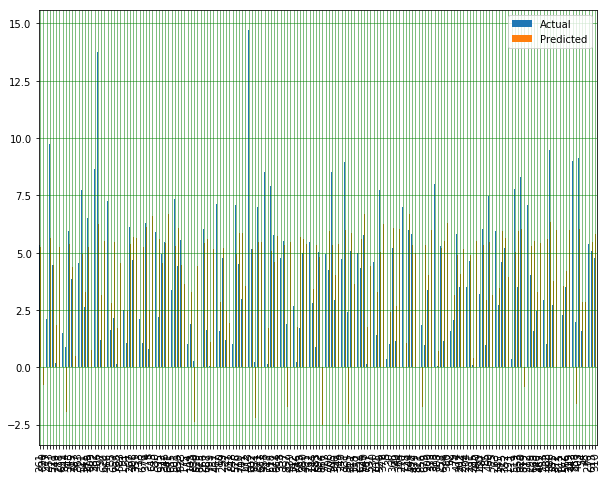

In [92]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

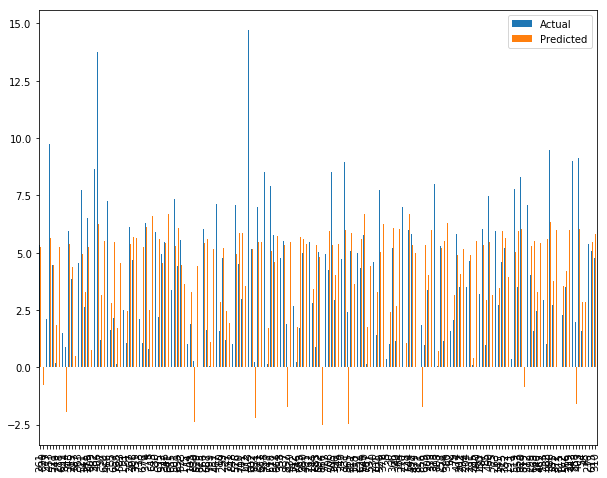

In [93]:
df.plot(kind='bar',figsize=(10,8))
plt.show()

Linear Regression Version 2

In [94]:
y_pred = regression_model.fit(X_train, y_train)
y_pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
regression_model.intercept_

1.3188398426748993

In [96]:
scores = cross_val_score(regression_model, features, target, cv=10)
scores

array([-3.51505803e+01, -1.94198124e+00, -1.64042128e-01, -1.63835182e-01,
       -1.57549470e+00, -4.49018142e+00,  2.38631945e-01, -5.21788383e+00,
       -5.14096234e+00, -2.50913570e+02])

In [97]:
print("The mean of the folds are", scores.mean(),"and the standard deviation is" ,scores.std())


The mean of the folds are -30.45198989659923 and the standard deviation is 74.162070913103


## LSTM Neural Network Model

In [143]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 12
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 12, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  #Calculate Mean Absolute Error
  train_lstmMAE = (mean_absolute_error(trainY[0], trainPredict[:,0]))
  print('Train Mean Absolute Error: %.2f MAE' % (train_lstmMAE))
  test_lstmMAE = (mean_absolute_error(testY[0], testPredict[:,0]))
  print('Test Mean Absolute Error: %.2f MAE' % (test_lstmMAE))

  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot, label='Train')
  plt.plot(testPredictPlot, label='Test')
  plt.legend()
  plt.show()
  plt.close()
  
  #print(testY)
  #print(testPredict)

  model.summary()

return

Predicting Production

Epoch 1/5
 - 16s - loss: 0.0440
Epoch 2/5
 - 0s - loss: 0.0030
Epoch 3/5
 - 0s - loss: 9.7001e-04
Epoch 4/5
 - 0s - loss: 7.1280e-04
Epoch 5/5
 - 0s - loss: 5.4234e-04
Train Score: 2.12 RMSE
Test Score: 3.11 RMSE
Train Mean Absolute Error: 1.66 MAE
Test Mean Absolute Error: 1.93 MAE


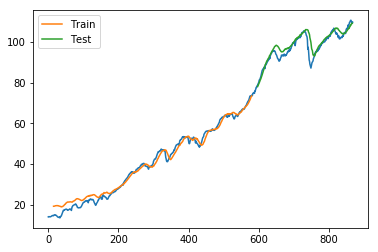

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_77 (LSTM)               (None, 4)                 320       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 5         
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 17s - loss: 0.0440
Epoch 2/5
 - 0s - loss: 0.0030
Epoch 3/5
 - 0s - loss: 9.7001e-04
Epoch 4/5
 - 0s - loss: 7.1280e-04
Epoch 5/5
 - 0s - loss: 5.4234e-04
Train Score: 2.12 RMSE
Test Score: 3.11 RMSE
Train Mean Absolute Error: 1.66 MAE
Test Mean Absolute Error: 1.93 MAE


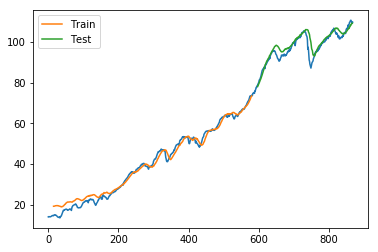

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 4)                 320       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 5         
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 19s - loss: 0.0803
Epoch 2/5
 - 0s - loss: 0.0497
Epoch 3/5
 - 0s - loss: 0.0318
Epoch 4/5
 - 0s - loss: 0.0229
Epoch 5/5
 - 0s - loss: 0.0192
Train Score: 12.99 RMSE
Test Score: 42.54 RMSE
Train Mean Absolute Error: 11.35 MAE
Test Mean Absolute Error: 42.10 MAE


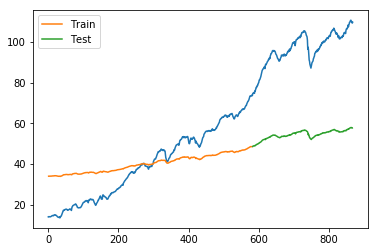

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_79 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [144]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 15, 
              epochs = 5)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 15, 
              epochs = 5)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 1, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 
              # Plot baseline and predictions

Predicting Debt

Epoch 1/5
 - 18s - loss: 0.0034
Epoch 2/5
 - 0s - loss: 0.0029
Epoch 3/5
 - 0s - loss: 0.0027
Epoch 4/5
 - 0s - loss: 0.0024
Epoch 5/5
 - 0s - loss: 0.0022
Train Score: 1012.26 RMSE
Test Score: 9172.86 RMSE
Train Mean Absolute Error: 764.53 MAE
Test Mean Absolute Error: 8103.43 MAE


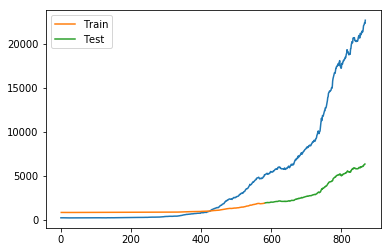

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 18s - loss: 0.0024
Epoch 2/5
 - 0s - loss: 0.0011
Epoch 3/5
 - 0s - loss: 3.4973e-04
Epoch 4/5
 - 0s - loss: 6.3040e-05
Epoch 5/5
 - 0s - loss: 2.6323e-05
Train Score: 112.15 RMSE
Test Score: 2954.95 RMSE
Train Mean Absolute Error: 77.10 MAE
Test Mean Absolute Error: 2402.26 MAE


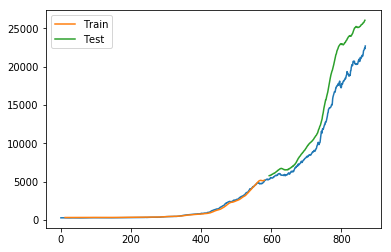

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 4)                 272       
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 5         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 17s - loss: 0.0034
Epoch 2/20
 - 0s - loss: 0.0029
Epoch 3/20
 - 0s - loss: 0.0027
Epoch 4/20
 - 0s - loss: 0.0024
Epoch 5/20
 - 0s - loss: 0.0022
Epoch 6/20
 - 0s - loss: 0.0019
Epoch 7/20
 - 0s - loss: 0.0016
Epoch 8/20
 - 0s - loss: 0.0013
Epoch 9/20
 - 0s - loss: 0.0010
Epoch 10/20
 - 0s - loss: 7.7413e-04
Epoch 11/20
 - 0s - loss: 5.0884e-04
Epoch 12/20
 - 0s - loss: 3.2883e-04
Epoch 13/20
 - 0s - loss: 1.8743e-04
Epoch 14/20
 - 0s - loss: 9.3731e-05
Epoch 15/20
 - 0s - loss: 4.3558e-05
Epoch 16/20
 - 0s - loss: 1.9

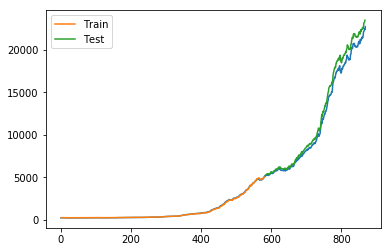

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_82 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [145]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 1, 
              epochs = 5)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 12, 
              epochs = 5)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 1, 
             epochs = 10, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Predicting Oil Price

Epoch 1/5
 - 17s - loss: 0.0073
Epoch 2/5
 - 0s - loss: 0.0041
Epoch 3/5
 - 0s - loss: 0.0029
Epoch 4/5
 - 0s - loss: 0.0019
Epoch 5/5
 - 0s - loss: 0.0010
Train Score: 3.49 RMSE
Test Score: 14.39 RMSE
Train Mean Absolute Error: 2.94 MAE
Test Mean Absolute Error: 11.22 MAE


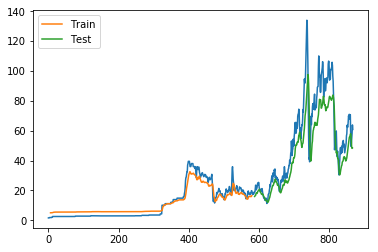

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_83 (LSTM)               (None, 4)                 176       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 19s - loss: 0.0057
Epoch 2/5
 - 0s - loss: 0.0021
Epoch 3/5
 - 0s - loss: 9.7823e-04
Epoch 4/5
 - 0s - loss: 5.2041e-04
Epoch 5/5
 - 0s - loss: 4.1978e-04
Train Score: 2.67 RMSE
Test Score: 17.99 RMSE
Train Mean Absolute Error: 1.63 MAE
Test Mean Absolute Error: 11.21 MAE


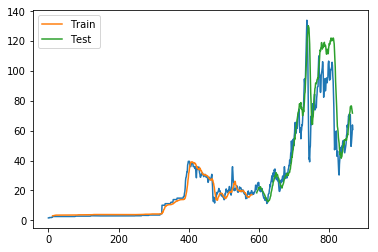

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 4)                 272       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 5         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 19s - loss: 0.0044
Epoch 2/5
 - 0s - loss: 0.0022
Epoch 3/5
 - 0s - loss: 0.0010
Epoch 4/5
 - 0s - loss: 3.9347e-04
Epoch 5/5
 - 0s - loss: 2.7186e-04
Train Score: 2.15 RMSE
Test Score: 14.24 RMSE
Train Mean Absolute Error: 1.03 MAE
Test Mean Absolute Error: 10.09 MAE


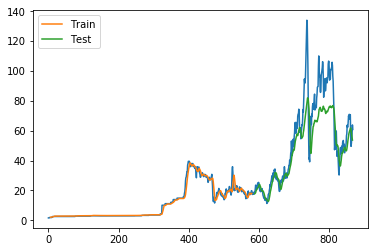

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_85 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [146]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 6, 
              epochs = 5)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 12, 
              epochs = 5)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 6, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Epoch 1/5
 - 29s - loss: 0.0463
Epoch 2/5
 - 0s - loss: 0.0309
Epoch 3/5
 - 0s - loss: 0.0242
Epoch 4/5
 - 0s - loss: 0.0212
Epoch 5/5
 - 0s - loss: 0.0190
Train Score: 31.15 RMSE
Test Score: 106.48 RMSE
Train Mean Absolute Error: 27.90 MAE
Test Mean Absolute Error: 104.08 MAE


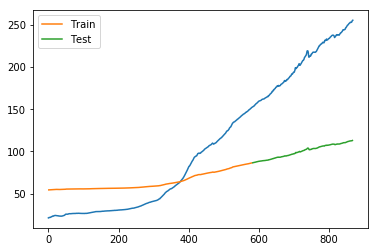

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_98 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 25s - loss: 0.0616
Epoch 2/5
 - 0s - loss: 0.0412
Epoch 3/5
 - 0s - loss: 0.0299
Epoch 4/5
 - 0s - loss: 0.0232
Epoch 5/5
 - 0s - loss: 0.0183
Train Score: 29.43 RMSE
Test Score: 91.86 RMSE
Train Mean Absolute Error: 26.95 MAE
Test Mean Absolute Error: 89.99 MAE


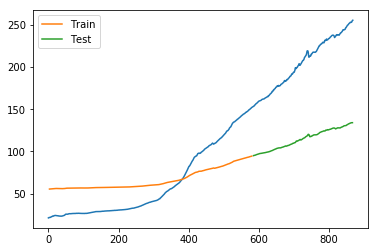

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_99 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 - 24s - loss: 0.0463
Epoch 2/5
 - 0s - loss: 0.0309
Epoch 3/5
 - 0s - loss: 0.0242
Epoch 4/5
 - 0s - loss: 0.0212
Epoch 5/5
 - 0s - loss: 0.0190
Train Score: 31.15 RMSE
Test Score: 106.48 RMSE
Train Mean Absolute Error: 27.90 MAE
Test Mean Absolute Error: 104.08 MAE


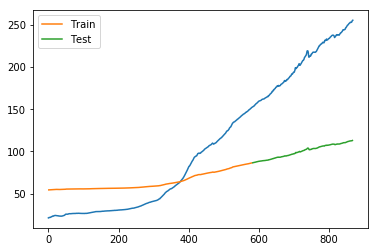

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 4)                 96        
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [151]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 1, 
              epochs = 5)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 3, 
              epochs = 5)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
               ts = 'CPI', 
               look_back = 1, 
               epochs = 5, 
               type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'CPI', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'CPI', 
               #look_back = 3, 
                #epochs = 5) 

Predicting 3 Month Treasury Bill

Epoch 1/20
 - 22s - loss: 0.0993
Epoch 2/20
 - 0s - loss: 0.0636
Epoch 3/20
 - 0s - loss: 0.0410
Epoch 4/20
 - 0s - loss: 0.0287
Epoch 5/20
 - 0s - loss: 0.0229
Epoch 6/20
 - 0s - loss: 0.0203
Epoch 7/20
 - 0s - loss: 0.0185
Epoch 8/20
 - 0s - loss: 0.0168
Epoch 9/20
 - 0s - loss: 0.0149
Epoch 10/20
 - 0s - loss: 0.0130
Epoch 11/20
 - 0s - loss: 0.0110
Epoch 12/20
 - 0s - loss: 0.0090
Epoch 13/20
 - 0s - loss: 0.0072
Epoch 14/20
 - 0s - loss: 0.0055
Epoch 15/20
 - 0s - loss: 0.0040
Epoch 16/20
 - 0s - loss: 0.0029
Epoch 17/20
 - 0s - loss: 0.0021
Epoch 18/20
 - 0s - loss: 0.0015
Epoch 19/20
 - 0s - loss: 0.0012
Epoch 20/20
 - 0s - loss: 0.0010
Train Score: 0.51 RMSE
Test Score: 0.51 RMSE
Train Mean Absolute Error: 0.34 MAE
Test Mean Absolute Error: 0.43 MAE


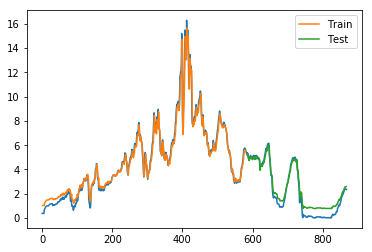

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_95 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 25s - loss: 0.1311
Epoch 2/20
 - 0s - loss: 0.0859
Epoch 3/20
 - 0s - loss: 0.0525
Epoch 4/20
 - 0s - loss: 0.0301
Epoch 5/20
 - 0s - loss: 0.0203
Epoch 6/20
 - 0s - loss: 0.0165
Epoch 7/20
 - 0s - loss: 0.0138
Epoch 8/20
 - 0s - loss: 0.0115
Epoch 9/20
 - 0s - loss: 0.0093
Epoch 10/20
 - 0s - loss: 0.0074
Epoch 11/20
 - 0s - loss: 0.0059
Epoch 12/20
 - 0s - loss: 0.0047
Epoch 13/20
 - 0s - loss: 0.0038
Epoch 14/20
 - 0s - loss: 0.0032
Epoch 15/20
 - 0s - loss: 0.0028
Epoch 16/20
 - 0s - loss: 0.0026
Epoch 17/20
 - 0s - 

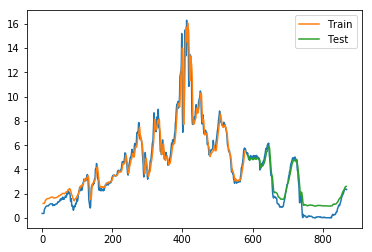

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 23s - loss: 0.0993
Epoch 2/20
 - 0s - loss: 0.0636
Epoch 3/20
 - 0s - loss: 0.0410
Epoch 4/20
 - 0s - loss: 0.0287
Epoch 5/20
 - 0s - loss: 0.0229
Epoch 6/20
 - 0s - loss: 0.0203
Epoch 7/20
 - 0s - loss: 0.0185
Epoch 8/20
 - 0s - loss: 0.0168
Epoch 9/20
 - 0s - loss: 0.0149
Epoch 10/20
 - 0s - loss: 0.0130
Epoch 11/20
 - 0s - loss: 0.0110
Epoch 12/20
 - 0s - loss: 0.0090
Epoch 13/20
 - 0s - loss: 0.0072
Epoch 14/20
 - 0s - loss: 0.0055
Epoch 15/20
 - 0s - loss: 0.0040
Epoch 16/20
 - 0s - loss: 0.0029
Epoch 17/20
 - 0s - 

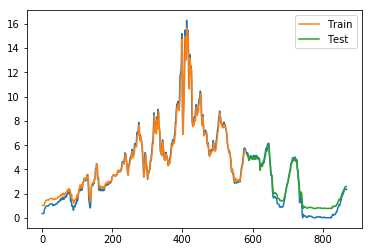

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_97 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [150]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Rate', 
              look_back = 1, 
              epochs = 20)

#LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Rate', 
              look_back = 3, 
              epochs = 20)

#LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Rate', 
              look_back = 1, 
              epochs = 20, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

## Add 10 Year Treasury Rate
3 Month/10 Year Inversion is a Sign of Looming Recession

In [152]:
#Introducing 10 Year Treasury Bill
ten_rate = pd.read_csv("ten_rate.csv")

In [154]:
ten_rate.dtypes

Date         object
Ten_Rate    float64
dtype: object

In [155]:
ten_rate['Date'] = ten_rate['Date'].astype('datetime64[ns]')

In [156]:
display(ten_rate.isnull().any())

Date        False
Ten_Rate    False
dtype: bool

In [157]:
econ = pd.merge(econ, ten_rate)

In [162]:
econ.corr()

,WTI,CPI,Prod,Debt,Rate,Ten_Rate
WTI,1.000000,0.803173,0.770804,0.783155,-0.456236,-0.407128
CPI,0.803173,1.000000,0.977197,0.903632,-0.574482,-0.513321
Prod,0.770804,0.977197,1.000000,0.860492,-0.548800,-0.520789
Debt,0.783155,0.903632,0.860492,1.000000,-0.687465,-0.677439
Rate,-0.456236,-0.574482,-0.548800,-0.687465,1.000000,0.923553
Ten_Rate,-0.407128,-0.513321,-0.520789,-0.677439,0.923553,1.000000


(0, 17.17633789235562)

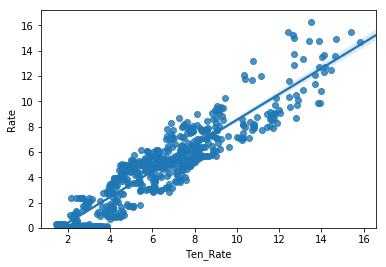

In [167]:
sns.regplot(x="Ten_Rate",y="Rate", data=econ)
plt.ylim(0,)

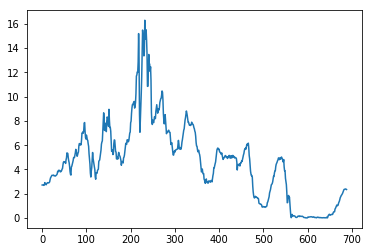

In [173]:
#Plot Inflation
rates = econ['Rate']
plt.plot(rates)
plt.show()